# Практическая работа 6

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

## Задание 1
 Найти данные для кластеризации.

In [ ]:
url = 'https://raw.githubusercontent.com/InspectorJelly/BigDataMirea/refs/heads/main/datasets/data_Statistics.csv'
data = pd.read_csv(url)

## Задание 2
Провести кластеризацию данных с помощью алгоритма k-means. Использовать правило локтя» и коэффициент силуэта для поиска оптимального количества кластеров.

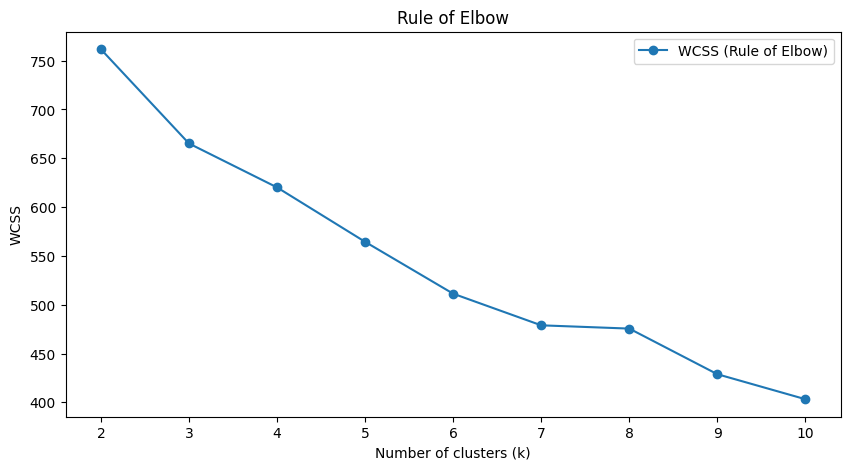

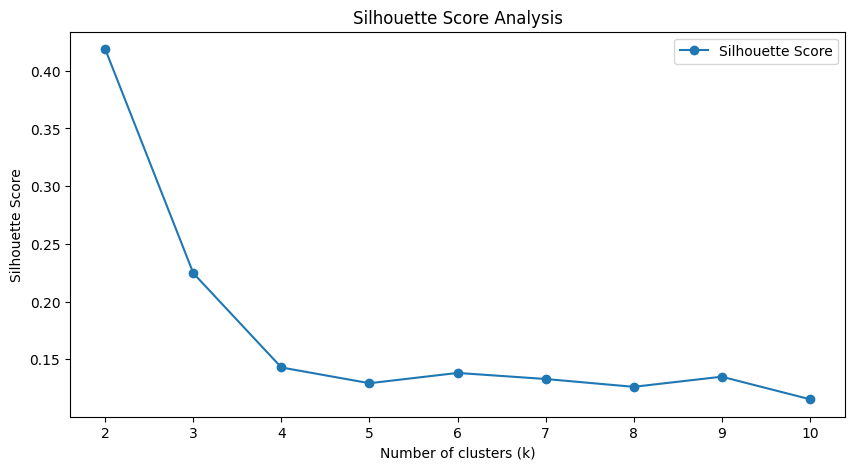

Оптимальное количество кластеров по коэффициенту силуэта: 2
Результаты кластеризации сохранены в 'clustered_data.csv'.


In [ ]:
numerical_features = [
    'Placed', 'Eliminations', 'Assists', 'Revives', 'Accuracy', 'Hits',
    'Head Shots', 'Distance Traveled', 'Materials Gathered',
    'Materials Used', 'Damage Taken', 'Damage to Players',
    'Damage to Structures'
]
data_numeric = data[numerical_features]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []  # Коэффициент силуэта

k_values = range(2, 11)  # Проверяем значения от 2 до 10 кластеров

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

    labels = kmeans.labels_
    silhouette = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, marker='o', label='WCSS (Rule of Elbow)')
plt.title('Rule of Elbow')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Оптимальное количество кластеров по коэффициенту силуэта: {optimal_k}")

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(data_scaled)
data['Cluster'] = final_kmeans.labels_

data.to_csv('clustered_data.csv', index=False)
print("Результаты кластеризации сохранены в 'clustered_data.csv'.")

## Задание 3
 Провести кластеризацию данных с помощью алгоритма иерархической кластеризации.

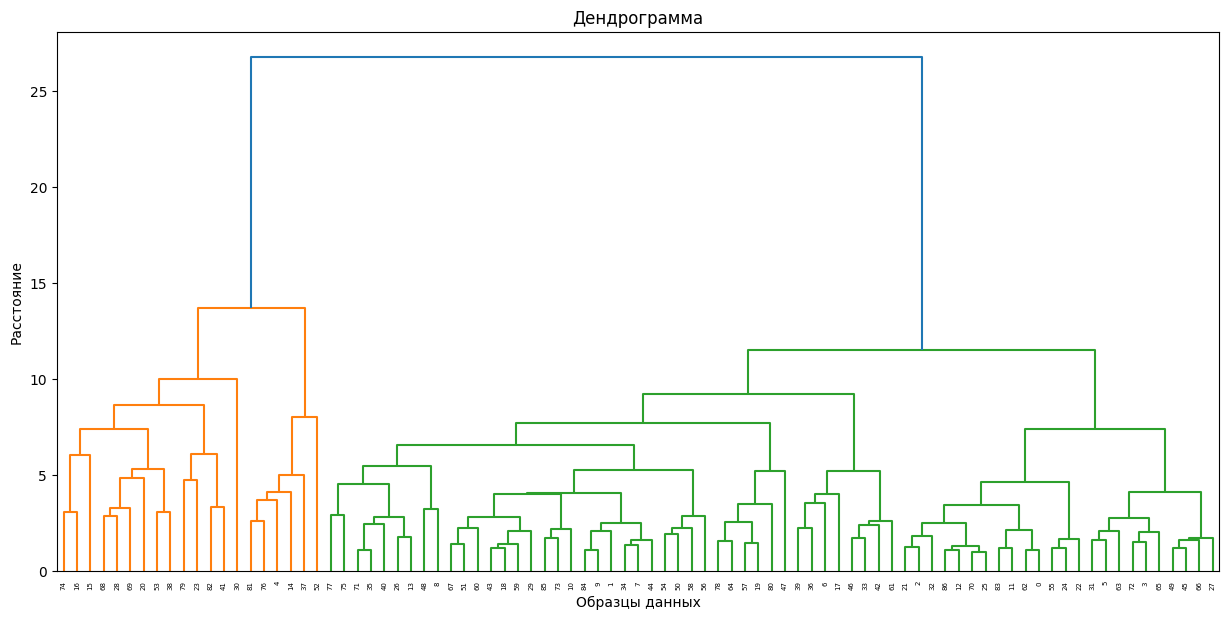

In [ ]:
numerical_features = [
    'Placed', 'Eliminations', 'Assists', 'Revives', 'Accuracy', 'Hits',
    'Head Shots', 'Distance Traveled', 'Materials Gathered',
    'Materials Used', 'Damage Taken', 'Damage to Players',
    'Damage to Structures'
]
data_numeric = data[numerical_features]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

linked = linkage(data_scaled, method='ward')  # Метод "ward" минимизирует дисперсию внутри кластеров

plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Дендрограмма')
plt.xlabel('Образцы данных')
plt.ylabel('Расстояние')
plt.show()

num_clusters = 4
clusters = fcluster(linked, num_clusters, criterion='maxclust')

data['Cluster'] = clusters

## Задание 4
 Провести кластеризацию данных с помощью алгоритма DBSCAN.

Количество кластеров: 2
Количество шумовых точек: 59


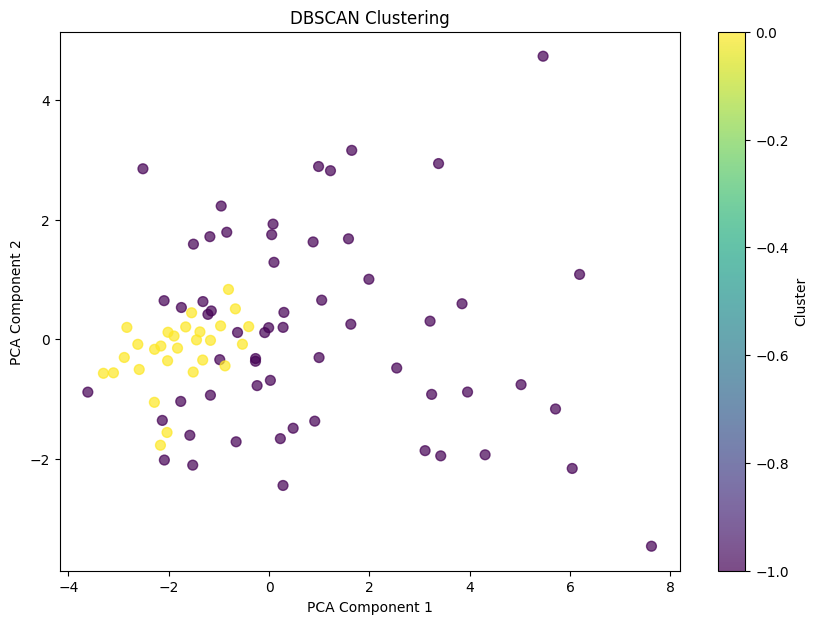

In [ ]:
numerical_features = [
    'Placed', 'Eliminations', 'Assists', 'Revives', 'Accuracy', 'Hits',
    'Head Shots', 'Distance Traveled', 'Materials Gathered',
    'Materials Used', 'Damage Taken', 'Damage to Players',
    'Damage to Structures'
]
data_numeric = data[numerical_features]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

eps = 1.5  # Максимальное расстояние между соседними точками
min_samples = 5  # Минимальное количество точек для образования кластера

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['Cluster'] = dbscan.fit_predict(data_scaled)

n_clusters = len(set(data['Cluster'])) - (1 if -1 in data['Cluster'] else 0)
n_noise = list(data['Cluster']).count(-1)

print(f"Количество кластеров: {n_clusters}")
print(f"Количество шумовых точек: {n_noise}")

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

## Задание 5
Визуализировать кластеризованные данные с помощью t-SNE или UMAP, если необходимо. Если данные трехмерные, то можно использовать трехмерный точечный график.

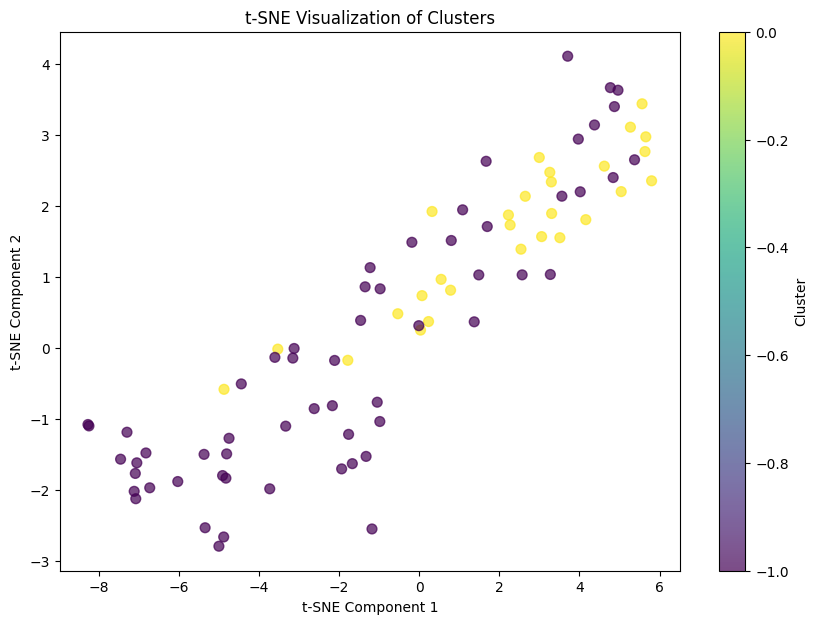

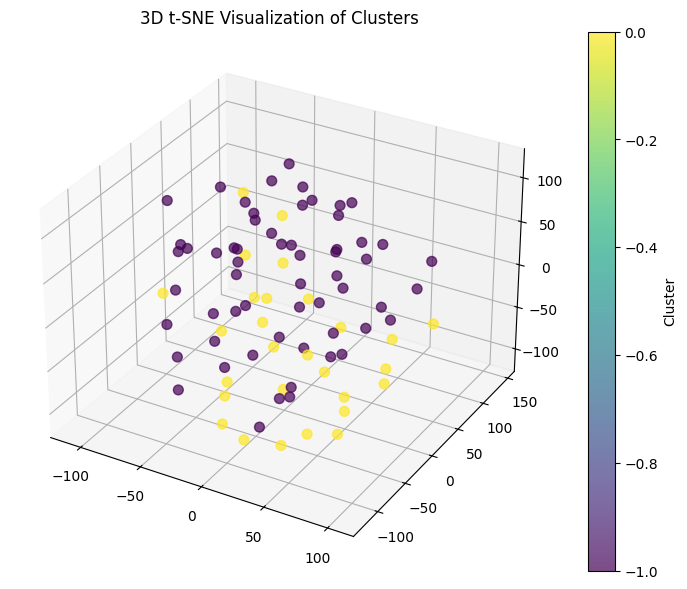

In [ ]:
numerical_features = [
    'Placed', 'Eliminations', 'Assists', 'Revives', 'Accuracy', 'Hits',
    'Head Shots', 'Distance Traveled', 'Materials Gathered',
    'Materials Used', 'Damage Taken', 'Damage to Players',
    'Damage to Structures'
]
data_numeric = data[numerical_features]
clusters = data['Cluster']

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(data_numeric)

plt.figure(figsize=(10, 7))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
data_tsne_3d = tsne_3d.fit_transform(data_numeric)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_tsne_3d[:, 0], data_tsne_3d[:, 1], data_tsne_3d[:, 2],
                     c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title('3D t-SNE Visualization of Clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()